In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.special import binom
import pandas as pd
#import math
#import pickle
#import statsmodels.stats.power
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
#import statsmodels.stats.multitest as mt
#from sklearn import datasets

# Galton dataset

In [57]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


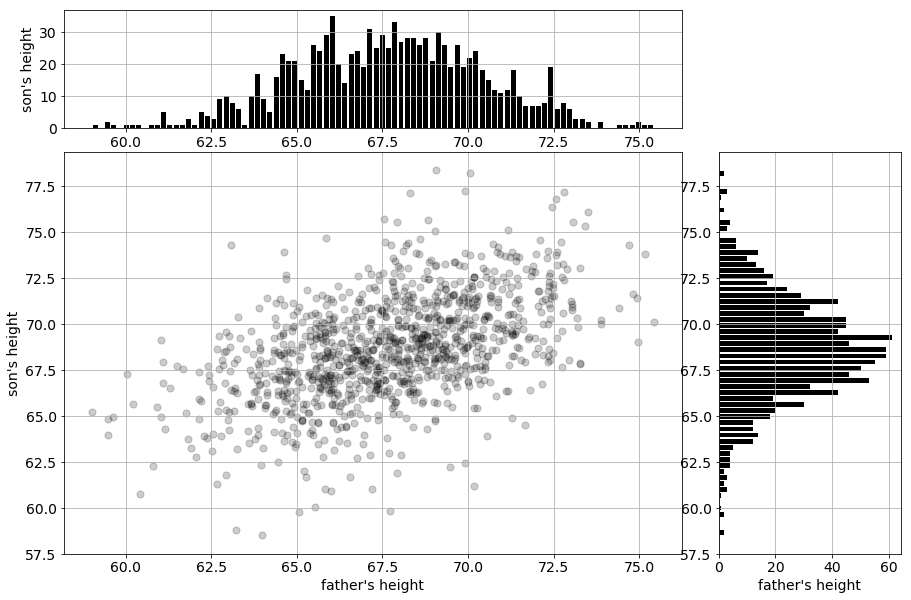

In [58]:
# see https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.update({'font.size': 14})

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(fheight, sheight, c='k', alpha = .2, s=50)
ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.grid(True)

ax_fDist.hist(fheight, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(sheight, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()

In [59]:
x = np.random.randn(10) + 6
y = x/3 + np.random.randn(10)/1.5 - 2
x1 = np.array(range(11))

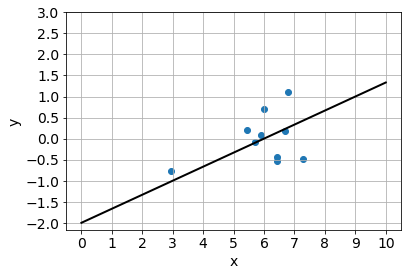

In [60]:
plt.scatter(x, y)
plt.plot(x1, x1/3 - 2, '-', c='k', lw=2)
plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

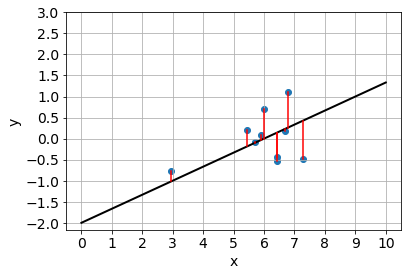

In [61]:
def f(x):
    return x/3 - 2

yf = f(x)
plt.scatter(x, y)
plt.plot(x1, f(x1), '-', c='k', lw=2)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]

plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

beta0: 33.88660435407794 beta1: 0.5140930386233075
intercept: 33.88660435407803 coefficient: 0.5140930386233061


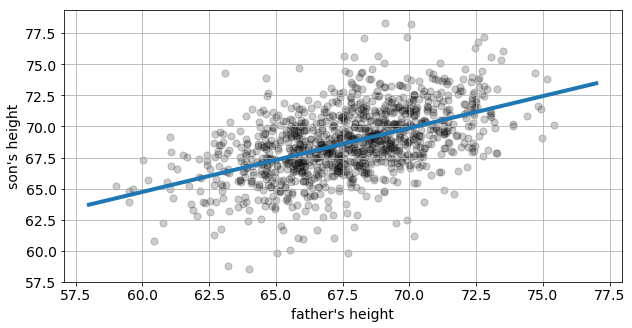

In [62]:
# see https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

x, y = np.array(fheight), np.array(sheight)
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
print('beta0:', beta0, 'beta1:', beta1)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
print('intercept:', lm.params[0], 'coefficient:', lm.params[1])

x1 = np.linspace(58, 77, 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="father's height", ylabel="son's height")
ax.grid(True)
plt.show()

# Regresia catre medie

In [63]:
x = np.random.randn(10)
ordered = np.argsort(x)[::-1]

y = np.random.randn(10)

# doar in 1 caz din 11 vom obtine un numar mai mic
print(x[ordered[0]], '>', y[ordered[0]])

1.58540674397286 > 0.5645792811541354


In [64]:
# verificare
n = 10000000
x = np.random.randn(n, 10)
ordered = np.argsort(x, axis=1)
for i in range(x.shape[0]):
    x[i, :] = x[i, ordered[i][::-1]]

y = np.random.randn(n, 10)
print(np.sum(x[:, 0] < y[:, 0]) / n, 'vs. 1/11 =', 1/11)

0.0909571 vs. 1/11 = 0.09090909090909091


rho: 0.501338311172343


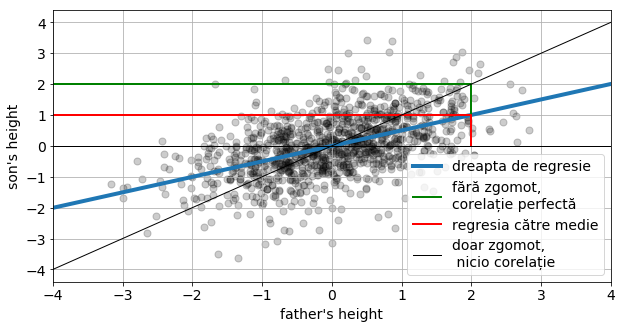

In [65]:
# originea este acum (Xbar, Ybar)
x, y = np.array(fheight), np.array(sheight)
x, y = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y)
rho = np.corrcoef(x, y)[0, 1]
print('rho:', rho)

x1 = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, rho * x1, lw=4)
ax.plot([2, 2, -4], [0, 2, 2], 'g', lw=2)
ax.plot([2, 2, -4], [0, 1, 1], 'r', lw=2)
ax.plot(x1, x1, lw=1, c='k')
ax.plot(x1, [0] * len(x1), lw=1, c='k')
ax.legend(['dreapta de regresie', 'fără zgomot,\ncorelație perfectă', 'regresia către medie', 
           'doar zgomot,\n nicio corelație'])
ax.set(xlabel="father's height", ylabel="son's height", xlim=(-4, 4))
ax.grid(True)
plt.show()

# Laborator

Q1. Considerăm setul $X = \{0.725, 0.429, -0.372, 0.863\}$. Ce valoare a lui $\mu$ minimizează $\sum_i (X_i - \mu)^2$ ? Verificați cu câteva valori în jur.

In [66]:
x_values = np.array([0.725,0.429, -0.372,0.863])
n = x_values.shape[0]

mu = (1/n) * np.sum(x_values)
print('mu: ', mu)

mu:  0.41125


In [67]:
x_values = np.array([0.725,0.429, -0.372,0.863])
mu_values = np.arange(-0.5, 2, 0.15)

for mu in mu_values:
    print(round(np.sum((x_values - mu)**2), 4), '\tMu: ', mu)

4.2378 	Mu:  -0.5
3.2343 	Mu:  -0.35
2.4108 	Mu:  -0.19999999999999996
1.7673 	Mu:  -0.04999999999999993
1.3038 	Mu:  0.10000000000000009
1.0203 	Mu:  0.2500000000000001
0.9168 	Mu:  0.40000000000000013
0.9933 	Mu:  0.5500000000000003
1.2498 	Mu:  0.7000000000000002
1.6863 	Mu:  0.8500000000000001
2.3028 	Mu:  1.0000000000000002
3.0993 	Mu:  1.1500000000000004
4.0758 	Mu:  1.3000000000000003
5.2323 	Mu:  1.4500000000000002
6.5688 	Mu:  1.6000000000000005
8.0853 	Mu:  1.7500000000000004
9.7818 	Mu:  1.9000000000000004


Q2. Pentru problema anterioară, considerăm că se dă un set de ponderi $w = \{2, 2, 1, 1\}$. Dorim să minimizăm suma $\sum_i w_i(x-\mu)^2$. Ce valoare pentru $\mu$ obținem?

In [68]:
weights = np.array([2, 2, 1, 1])

mu = np.sum(x_values * weights) / np.sum(weights)
print('mu:', mu)

mu: 0.46649999999999997


Q3. Pentru setul Galton (fathers.sons):
    
a) găsiți media, deviația standard și corelația dintre înălțimile părinților și cele ale fiilor.
b) centrați variabilele pentru fii și părinți și verificați că variabilele centrate au media 0.
c) realizați același lucru pentru deviația standard și verificați că ea devine 1.
d) realizați procedura completă de normalizare (centrare + scalare) și verificați $N(0, 1)$.

a)

In [69]:
fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

In [70]:
f_mean = np.mean(fheight)
s_mean = np.mean(sheight)
f_std = np.std(fheight)
s_std = np.std(sheight)

print('Fathers\' mean:', f_mean)
print('Sons\' mean: ', s_mean)
print('Fathers\' std:', f_std)
print('Sons\' std: ', s_std)

correlation = np.corrcoef(fheight, sheight)
print('Correlation: ', correlation)

Fathers' mean: 67.68709686456401
Sons' mean:  68.6840696567718
Fathers' std: 2.743594987591043
Sons' std:  2.8133957698626495
Correlation:  [[1.         0.50133831]
 [0.50133831 1.        ]]


b)

In [71]:
#https://www.spss-tutorials.com/spss-mean-center-predictors-for-regression-with-moderation-interaction/

centered_fheight = fheight - f_mean
centered_sheight = sheight - s_mean

print(round(np.mean(centered_fheight), 5), '\n', round(np.mean(centered_sheight), 5))

-0.0 
 0.0


c)

In [72]:
#https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/PR_Mahal/scaling.htm

centered_fheight = fheight/f_std
centered_sheight = sheight/s_std

print(np.std(centered_fheight), '\n', np.std(centered_sheight))

1.0 
 1.0


d)

In [73]:
centered_fheight = fheight - f_mean
centered_sheight = sheight - s_mean
scaled_fheight = centered_fheight / f_std
scaled_sheight = centered_sheight / s_std

print(round(np.mean(scaled_fheight), 5))
print(round(np.mean(scaled_sheight), 5))

-0.0
0.0


Q4. Considerăm un dataset pentru care deviația standard a variabilei prezise este dublu față de deviația standard a predictorului său. Variabilele au o corelație de 0.3. Dacă potrivim un model de regresie liniară, care va fi panta estimată?

In [93]:
correlation = 0.3
y_std = 2
x_std = 1

slope = correlation * y_std / x_std
slope

0.6

Q5. Pentru problema anterioară, variabila prezisă are o medie 1 iar predictorul o medie de 0.5. Care este intercept-ul?

In [94]:
intercept = 1 - slope * 0.5
intercept

0.7

Q6. Avem două cântare care au asociat zgomot, și mai mulți oameni pe care vrem să-i cântărim. Vom cântări fiecare persoană pe ambele cântare. Corelația este de 0.75. Fiecare set de măsurători este normalizat. Masa cuiva este la 2 deviații standard peste medie în primul grup de cântăriri. La câte deviații standard față de medie estimăm că este masa corespondentă în al doilea grup?

In [100]:
corelation = 0.75
first_std = 2

# corelation = slope (setul este normalizat)
print(correlation * first_std)

1.5


Q7. Considerăm următorul dataset, în care încercăm să prezicem Y pe baza lui X:

In [78]:
x = [8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01]
y = [15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58]

a) determinați media și deviația standard pentru fiecare set X și Y;

b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

c) determinați coeficientul de corelație dintre cele două seturi;

d) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea zero (sau cât mai apropiat de zero); reprezentați într-un scatter plot;

e) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea 1, fără ca seturile să fie identice; reprezentați într-un scatter plot;

f) determinați corelația pentru problema inițială, precum și intercept-ul. Calculați dreapta de regresie prin cele două metode (manual și cu metoda statmodels.OLS), și reprezentați-o.

### a)

In [79]:
mu_x = np.mean(x)
print(mu_x)
mu_y = np.mean(y)
print(mu_y)

std_x = np.std(x)
std_y = np.std(y)
print(std_x)
print(std_y)

17.4984
26.473999999999997
4.321086141238103
6.381005249958662


### b)

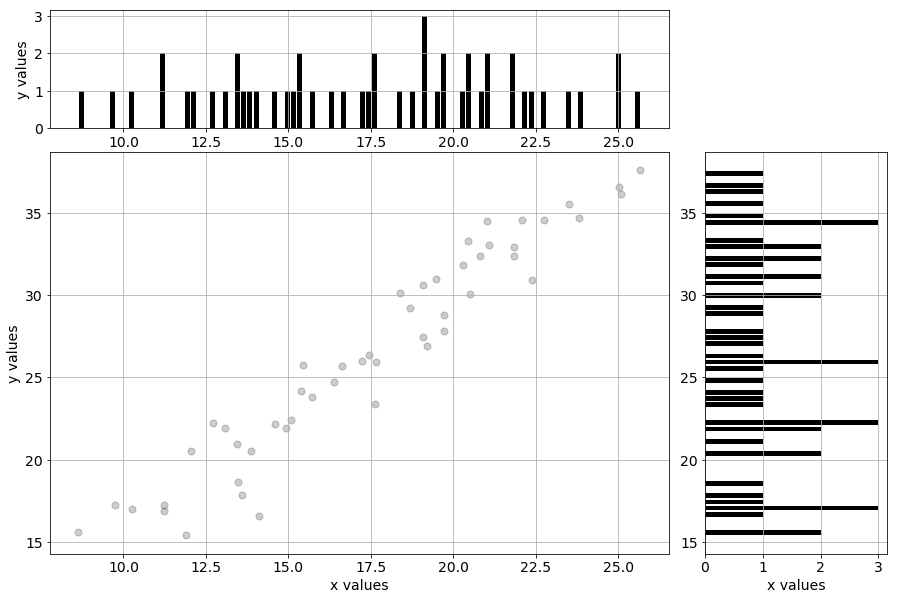

In [80]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(x, y, c='k', alpha = .2, s=50)
ax_main.set(xlabel="x values", ylabel="y values")
ax_main.grid(True)

ax_fDist.hist(x, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="y values")
ax_fDist.grid(True)

ax_sDist.hist(y, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="x values")
ax_sDist.grid(True)

plt.show()

### c)

In [81]:
correlation_coef = np.corrcoef(x, y)
correlation_coef

array([[1.        , 0.96383877],
       [0.96383877, 1.        ]])

### d)

[[1.         0.00303367]
 [0.00303367 1.        ]]


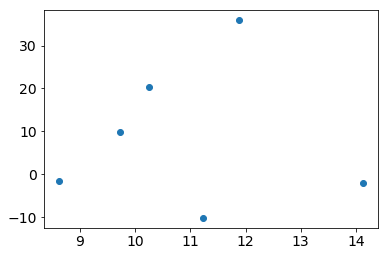

In [82]:
x = np.array([8.63, 11.23, 9.73, 11.89, 10.25, 14.12])
y = np.array([-1.63, -10.23, 9.73, 35.89, 20.25, -2.15])

correlation_coef = np.corrcoef(x, y)
print(correlation_coef)

plt.scatter(x, y)

[[1.         0.00619217]
 [0.00619217 1.        ]]


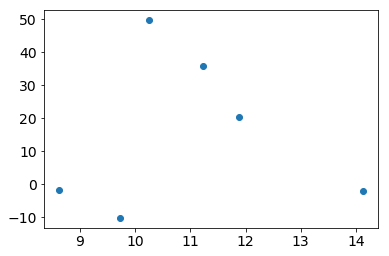

In [83]:
x = np.array([8.63, 9.73, 10.25, 11.23, 11.89, 14.12])
y = np.array([-1.63, -10.23, 49.73, 35.89, 20.25, -2.15])

correlation_coef = np.corrcoef(x, y)
print(correlation_coef)

plt.scatter(x, y)

### e)

[[1. 1.]
 [1. 1.]]


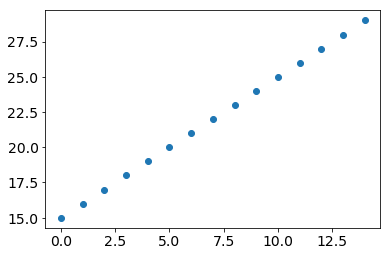

In [84]:
x = np.arange(0, 15)
y = np.arange(15, 30)
correlation_coef = np.corrcoef(x, y)
print(correlation_coef)
plt.scatter(x, y)

[[1. 1.]
 [1. 1.]]


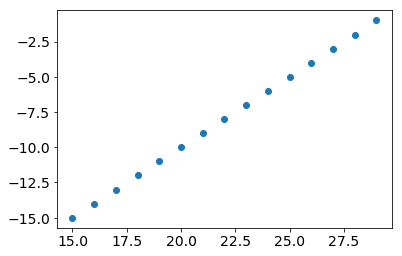

In [85]:
x = np.arange(15, 30)
y = np.arange(-15, 0)
correlation_coef = np.corrcoef(x, y)
print(correlation_coef)
plt.scatter(x, y)

In [86]:
correlation_coef = np.corrcoef(x, y)
correlation_coef

array([[1., 1.],
       [1., 1.]])

### f)

In [110]:
x = [8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01]
y = [15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58]

In [ ]:
# y = beta1 * x + beta0

In [114]:
correlation_coef = np.corrcoef(x, y)
correlation_coef = correlation_coef[0, 1]
slope = correlation_coef * np.std(y) / np.std(x)
intercept = np.mean(y) - slope * np.mean(x)

print('Correlation coefficient: {0}\nIntercept: {1} '.format(correlation_coef, intercept))

Correlation coefficient: 0.9638387722596928
Intercept: 1.5682909446285827 


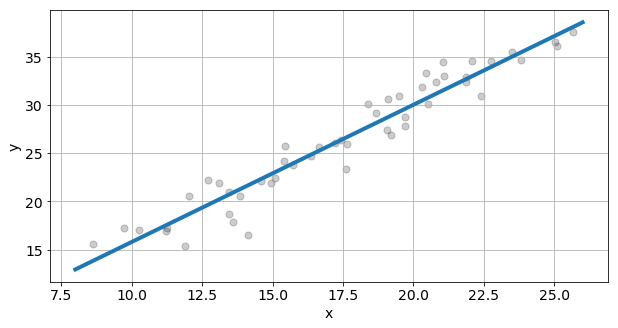

In [127]:
beta1 = np.corrcoef(x,y)[0,1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)

x1 = np.linspace(8,26,100)
y1 = beta1*x1+beta0

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()

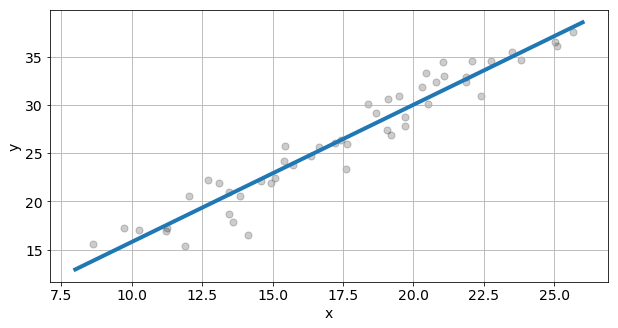

In [126]:
xext = sm.add_constant(x)
model = sm.OLS(y,xext).fit()

beta0 = model.params[0]
beta1 = model.params[1]

x1 = np.linspace(8,26,100)
y1 = beta1*x1+beta0

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()

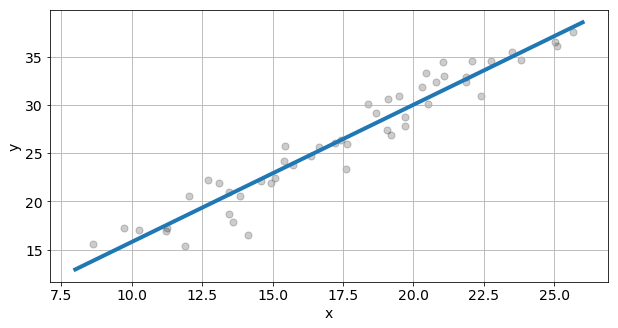

In [116]:
xext = sm.add_constant(x)
model = sm.OLS(y,xext).fit()
beta0 = model.params[0]
beta1 = model.params[1]
y1 = beta1*np.array(x)+beta0
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()

Q8. Folosiți setul mtcars.csv. Realizați o regresie liniară cu consumul (miles per gallon) ca variabilă prezisă pe baza puterii motorului (horsepower). Realizați scatter plot-ul și trasați dreapta de regresie. Care este eroarea pătratică medie (RMS) dintre valorile de consum reale și valorile prezise?

In [89]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [90]:
mpg = mtcars['mpg'].values
hp = mtcars['hp'].values

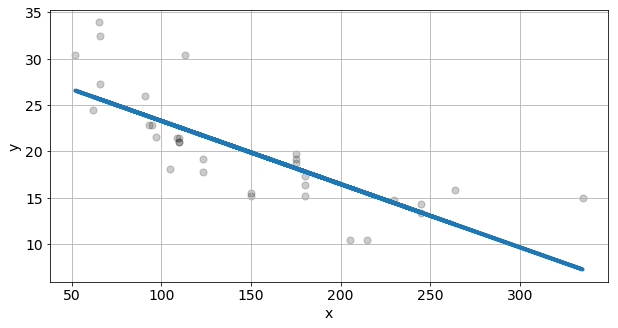

Eroarea patratica medie :  3.7402970868994894


In [128]:
x, y = hp, mpg

beta1 = np.corrcoef(x,y)[0,1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)

y1 = beta1*x+beta0
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()

mse = np.sqrt(mean_squared_error(y,y1))
print("Eroarea patratica medie : ", mse)